In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV,learning_curve,KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../dataset/full_preprocessed_titanic.csv')
df.head()

,age,fare,family_size,sibsp,parch,fare_per_person,embarked_C,embarked_Q,embarked_S,pclass_1.0,...,deck_D,deck_E,deck_F,deck_G,age_group_Adult,age_group_Child,age_group_Teen,sex,is_alone,survived
0,0.375000,0.014151,0.1,0.125,0.0,0.007076,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0
1,0.682692,0.139136,0.1,0.125,0.0,0.069568,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0
2,0.451923,0.015469,0.0,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1.0
3,0.625000,0.103644,0.1,0.125,0.0,0.051822,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0
4,0.625000,0.015713,0.0,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              891 non-null    float64
 1   fare             891 non-null    float64
 2   family_size      891 non-null    float64
 3   sibsp            891 non-null    float64
 4   parch            891 non-null    float64
 5   fare_per_person  891 non-null    float64
 6   embarked_C       891 non-null    float64
 7   embarked_Q       891 non-null    float64
 8   embarked_S       891 non-null    float64
 9   pclass_1.0       891 non-null    float64
 10  pclass_2.0       891 non-null    float64
 11  pclass_3.0       891 non-null    float64
 12  class_First      891 non-null    float64
 13  class_Second     891 non-null    float64
 14  class_Third      891 non-null    float64
 15  deck_A           891 non-null    float64
 16  deck_B           891 non-null    float64
 17  deck_C          

In [5]:
df.isnull().sum()

age                0
fare               0
family_size        0
sibsp              0
parch              0
fare_per_person    0
embarked_C         0
embarked_Q         0
embarked_S         0
pclass_1.0         0
pclass_2.0         0
pclass_3.0         0
class_First        0
class_Second       0
class_Third        0
deck_A             0
deck_B             0
deck_C             0
deck_D             0
deck_E             0
deck_F             0
deck_G             0
age_group_Adult    0
age_group_Child    0
age_group_Teen     0
sex                0
is_alone           0
survived           0
dtype: int64

In [7]:
X = df.drop(['survived'],axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create initial decision tree with default parameters
initial_tree = DecisionTreeClassifier(random_state=42)
initial_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Calculate initial scores
train_score = initial_tree.score(X_train, y_train)
cv_scores = cross_val_score(initial_tree, X, y, cv=5)

In [22]:
print("Initial Model Performance:")
print(f"Training Score: %{(train_score*100):.2f}")
print(f"Cross-validation Score: %{(cv_scores.mean()*100):.2f} (+/- {(cv_scores.std() *200):.2f})")


Initial Model Performance:
Training Score: %98.31
Cross-validation Score: %77.22 (+/- 5.19)


In [49]:
def evaluate_tree_depths(X_train, y_train, X_test, y_test, depths=[None]):
    results = []
    
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X_train, y_train)
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)
        cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
        
        results.append({
            'depth': depth if depth is not None else 'No limit',
            'train_score': train_score,
            'test_score': test_score,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        })
    
    return pd.DataFrame(results)

In [50]:
# Evaluate different depths
depth_results = evaluate_tree_depths(X_train, y_train, X_test, y_test,depths=[3, 5, 10,21, None])
print("\nResults for different tree depths:")
depth_results


Results for different tree depths:


,depth,train_score,test_score,cv_mean,cv_std
0,3,0.834270,0.798883,0.813169,0.023219
1,5,0.858146,0.804469,0.806166,0.016541
2,10,0.924157,0.810056,0.786566,0.035839
3,21,0.983146,0.765363,0.786566,0.020559
4,No limit,0.983146,0.765363,0.783749,0.023690


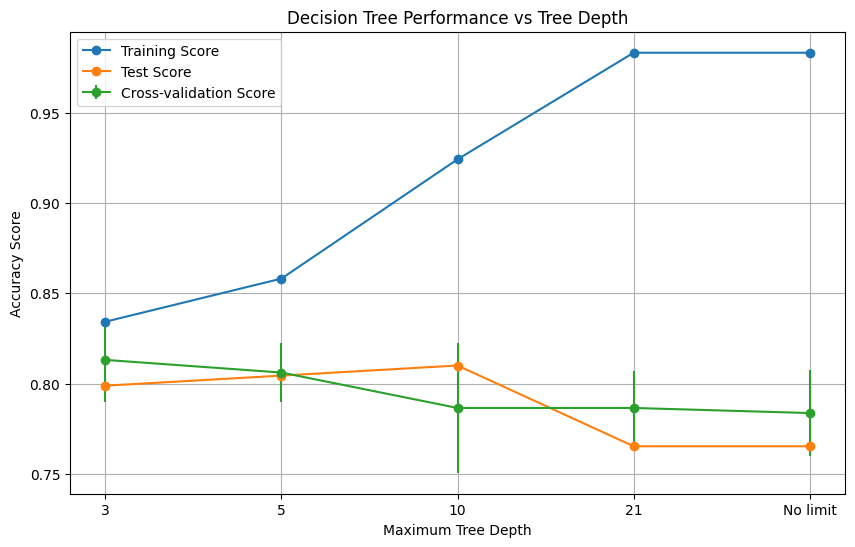

In [51]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    range(len(depth_results)),
    depth_results["train_score"],
    label="Training Score",
    marker="o",
)
plt.errorbar(
    range(len(depth_results)),
    depth_results["test_score"],
    label="Test Score",
    marker="o",
)
plt.errorbar(
    range(len(depth_results)),
    depth_results["cv_mean"],
    yerr=depth_results["cv_std"],
    label="Cross-validation Score",
    marker="o",
)
plt.xticks(range(len(depth_results)), depth_results["depth"])
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Accuracy Score")
plt.title("Decision Tree Performance vs Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [95]:
param_grid = {
    'max_depth': list(range(1, 30,2)),
    'min_samples_split': list(range(2, 30,2)),
    'min_samples_leaf': list(range(1, 30,2))
}
cv = KFold(n_splits=5, random_state=42, shuffle=True)
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [96]:
best_params = grid_search.best_params_

In [97]:
best_params['max_depth']

3

In [116]:
# Create final model with best parameters
final_tree = DecisionTreeClassifier(
    max_depth=21,
    min_samples_split=20,
    min_samples_leaf=7,
    random_state=42
)


In [117]:
# Train and evaluate final model
final_tree.fit(X_train, y_train)
final_train_score = final_tree.score(X_train, y_train)
final_test_score = final_tree.score(X_test, y_test)
final_cv_scores = cross_val_score(final_tree, X_train, y_train, cv=5)

In [118]:
print("\nFinal Model Performance:")
print(f"Training Score: {final_train_score:.3f}")
print(f"Test Score: {final_test_score:.3f}")
print(f"Cross-validation Score: {final_cv_scores.mean():.3f} (+/- {final_cv_scores.std() * 2:.3f})")


Final Model Performance:
Training Score: 0.865
Test Score: 0.849
Cross-validation Score: 0.802 (+/- 0.063)


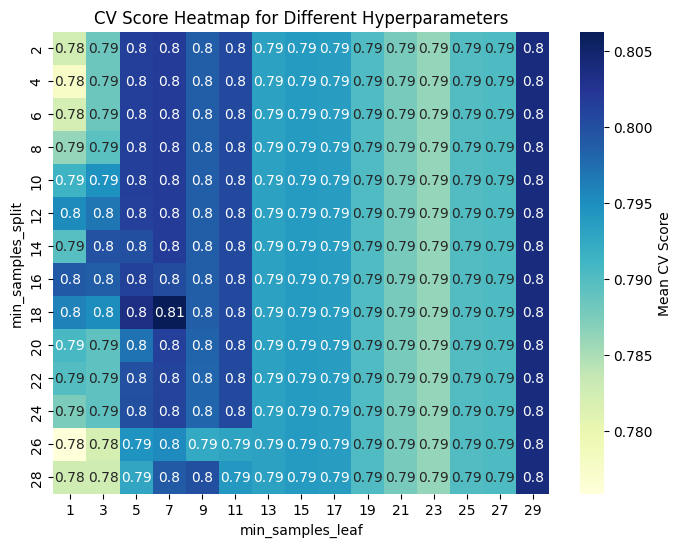

In [119]:
results_df = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results_df.pivot_table(
    index="param_min_samples_split",
    columns="param_min_samples_leaf",
    values="mean_test_score",
    aggfunc="mean"  # Aggregates duplicates by taking the mean of "mean_test_score"
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={"label": "Mean CV Score"})
plt.title("CV Score Heatmap for Different Hyperparameters")
plt.xlabel("min_samples_leaf")
plt.ylabel("min_samples_split")
plt.show()

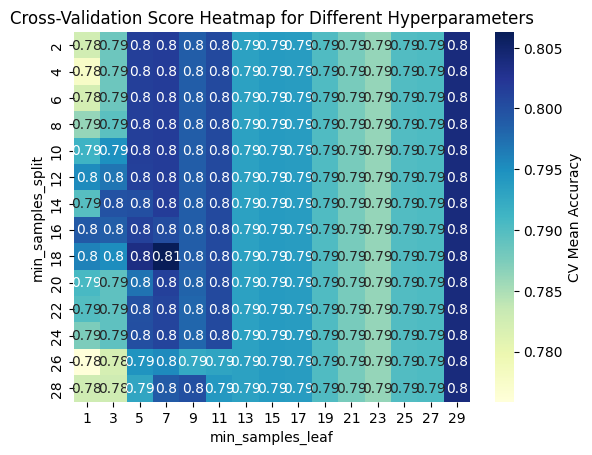

In [120]:
pivot_table = results_df.pivot_table(
    index="param_min_samples_split",
    columns="param_min_samples_leaf",
    values="mean_test_score",
    aggfunc="mean"  # Aggregates duplicates by taking the mean of "mean_test_score"
)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'CV Mean Accuracy'})
plt.title("Cross-Validation Score Heatmap for Different Hyperparameters")
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.show()

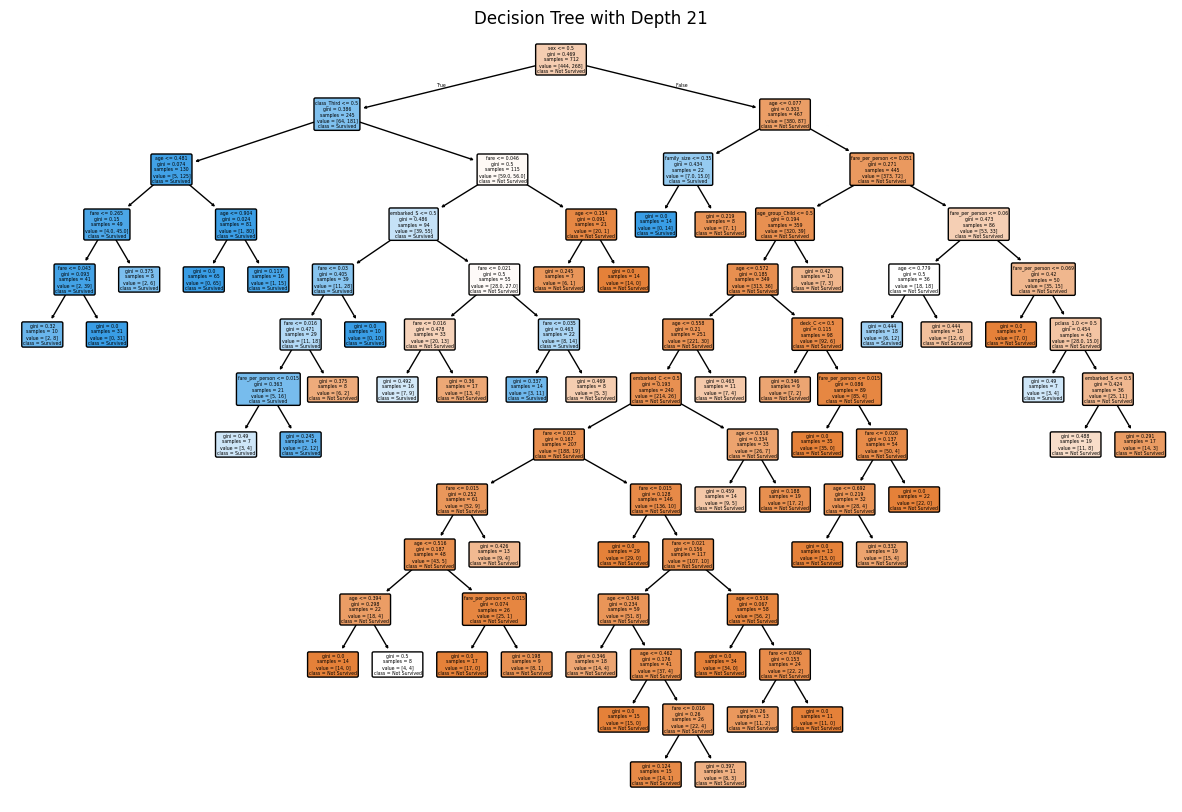

In [121]:
plt.figure(figsize=(15, 10))
plot_tree(final_tree, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], rounded=True)
plt.title("Decision Tree with Depth 21")
plt.show()

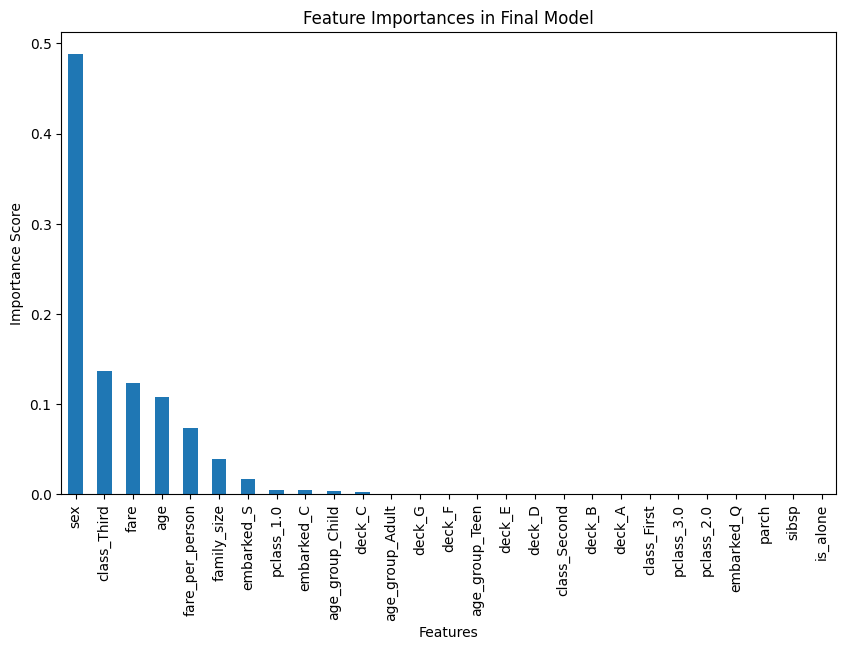

In [122]:
feature_importances = pd.Series(final_tree.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances in Final Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

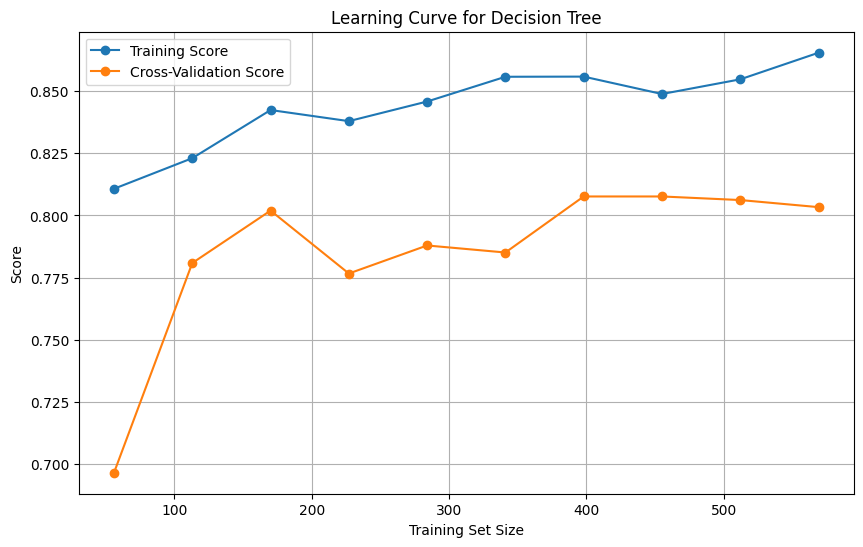

In [124]:
train_sizes, train_scores, cv_scores = learning_curve(final_tree, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, cv_scores.mean(axis=1), label='Cross-Validation Score', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()